# Assignment 3:

### This part bellow is from given tutorial:

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers, optimizers
import matplotlib.pyplot as plt

2024-10-08 18:31:15.380542: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-08 18:31:15.501122: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-08 18:31:15.532642: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-08 18:31:15.713401: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-08 18:31:17.447670: W tensorflow/compiler/tf2

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

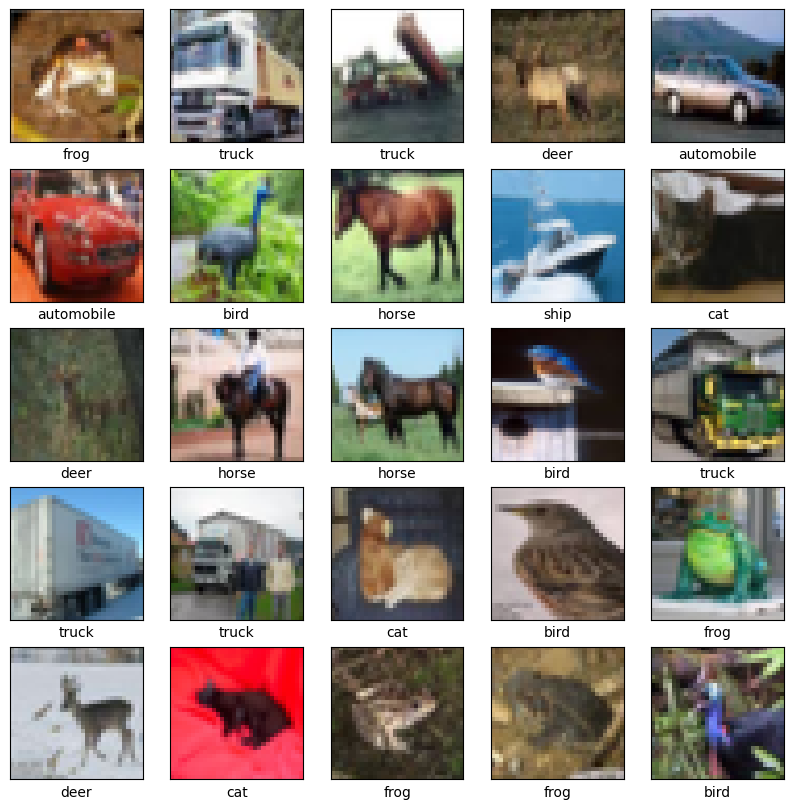

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

We put given model (from tutorial) in a function so that we can reuse it:

In [4]:
def create_model(activation):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation=activation, input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation=activation))
    model.add(layers.Dense(10))
    return model
    

In [5]:
model_relu = create_model(activation='relu')

/home/monika/PycharmProjects/masters/CDS/cds-ml/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1728405082.401518    4546 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-08 18:31:22.587623: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and se

then continuing with the tutorial:

In [6]:
model_relu.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
import pickle

with tf.device('/CPU:0'):
    model_relu.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    history_relu = model_relu.fit(train_images, train_labels, epochs=50, 
                        validation_data=(test_images, test_labels))
   
    model_relu.save_weights('model_relu_Adam.weights.h5')
    with open('history_relu_adam.pkl', 'wb') as file:
        pickle.dump(history_relu.history, file)


Epoch 1/50


2024-10-08 18:31:29.301401: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3414 - loss: 1.7793 - val_accuracy: 0.5400 - val_loss: 1.2968
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5722 - loss: 1.2093 - val_accuracy: 0.6117 - val_loss: 1.0892
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6382 - loss: 1.0331 - val_accuracy: 0.6464 - val_loss: 1.0049
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6743 - loss: 0.9290 - val_accuracy: 0.6677 - val_loss: 0.9507
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7034 - loss: 0.8526 - val_accuracy: 0.6876 - val_loss: 0.9059
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7224 - loss: 0.7955 - val_accuracy: 0.6734 - val_loss: 0.9400
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7407 - loss: 0.7414 - val_accuracy: 0.6835 - val_loss: 0.9063
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7545 - loss: 0.70

313/313 - 1s - 3ms/step - accuracy: 0.6794 - loss: 2.6770
0.6794000267982483


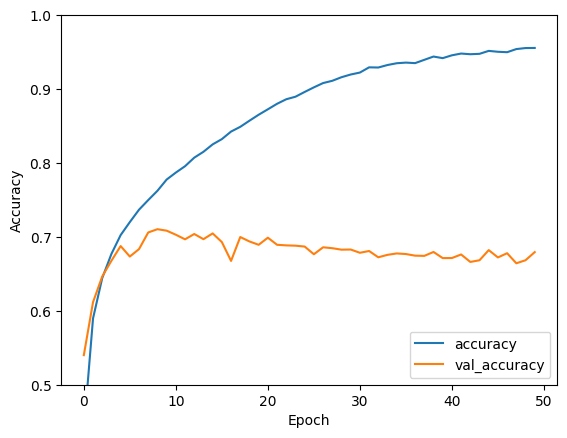

In [8]:
with open('history_relu_adam.pkl', 'rb') as file:
    history_relu = pickle.load(file)
    
model_relu.load_weights('model_relu_Adam.weights.h5')

plt.plot(history_relu['accuracy'], label='accuracy')
plt.plot(history_relu['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss_relu, test_acc_relu = model_relu.evaluate(test_images,  test_labels, verbose=2)
print(test_acc_relu)

from here onwards we use bits from tutorial but mainly continue with the exercise

 ## change relu to tanh() and compare results

In [9]:
model_tanh = create_model('tanh')

/home/monika/PycharmProjects/masters/CDS/cds-ml/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
with tf.device('/CPU:0'):
    model_tanh.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    history_tanh = model_tanh.fit(train_images, train_labels, epochs=50, 
                        validation_data=(test_images, test_labels))
    model_tanh.save_weights('model_tanh_Adam.weights.h5')
    with open('history_tanh_adam.pkl', 'wb') as file:
        pickle.dump(history_tanh.history, file)

Epoch 1/50


2024-10-08 18:44:53.256372: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.4258 - loss: 1.5989 - val_accuracy: 0.5804 - val_loss: 1.2136
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6000 - loss: 1.1459 - val_accuracy: 0.6060 - val_loss: 1.1259
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6451 - loss: 1.0285 - val_accuracy: 0.6336 - val_loss: 1.0709
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6689 - loss: 0.9545 - val_accuracy: 0.6338 - val_loss: 1.0717
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6882 - loss: 0.9030 - val_accuracy: 0.6568 - val_loss: 1.0102
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7054 - loss: 0.8434 - val_accuracy: 0.6675 - val_loss: 0.9824
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7214 - loss: 0.8071 - val_accuracy: 0.6691 - val_loss: 0.9662
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7382 - loss: 0.75

In [11]:
def compare_stats(history1, history2, model1, model2, name1, name2):
    plt.plot(history1['accuracy'], label=f'accuracy, {name1}')
    plt.plot(history2['accuracy'], label=f'accuracy, {name2}')
    plt.plot(history1['val_accuracy'], label = f'val_accuracy, {name1}')
    plt.plot(history2['val_accuracy'], label = f'val_accuracy, {name2}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    
    test_loss_1, test_acc_1 = model1.evaluate(test_images,  test_labels, verbose=2)
    test_loss_2, test_acc_2 = model2.evaluate(test_images,  test_labels, verbose=2)
    print(f'test accuracy of {name1}: {test_acc_1}')
    print(f'test accuracy of {name2}: {test_acc_2}')

313/313 - 1s - 3ms/step - accuracy: 0.6794 - loss: 2.6770
313/313 - 1s - 3ms/step - accuracy: 0.6432 - loss: 1.6304
test accuracy of relu model: 0.6794000267982483
test accuracy of tanh model: 0.6431999802589417


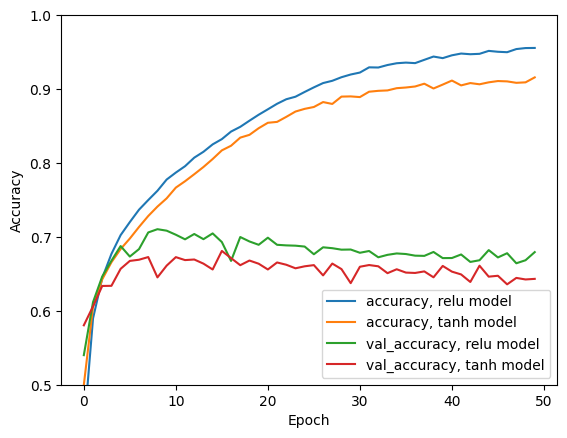

In [12]:
with open('history_tanh_adam.pkl', 'rb') as file:
    history_tanh = pickle.load(file)
    
model_tanh.load_weights('model_tanh_Adam.weights.h5')
compare_stats(history_relu, history_tanh, model_relu, model_tanh, 'relu model', 'tanh model')

Explanation: Tanh is reaching similar accuracy as ReLu but slower because the gradient gets smaller   

# Comparison of optimizers
### SGD:

In [13]:
with tf.device('/CPU:0'):
    model_relu_sgd = create_model('relu')
    model_relu_sgd.compile(optimizer='SGD',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    history_relu_sgd = model_relu_sgd.fit(train_images, train_labels, epochs=50, 
                        validation_data=(test_images, test_labels))
    model_relu_sgd.save_weights('model_relu_sgd.weights.h5')
    with open('history_relu_sgd.pkl', 'wb') as file:
        pickle.dump(history_relu_sgd.history, file)

Epoch 1/50


2024-10-08 18:58:06.835465: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.2009 - loss: 2.1589 - val_accuracy: 0.3679 - val_loss: 1.7572
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3928 - loss: 1.6879 - val_accuracy: 0.4562 - val_loss: 1.5086
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4665 - loss: 1.4683 - val_accuracy: 0.4579 - val_loss: 1.4972
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5171 - loss: 1.3539 - val_accuracy: 0.5442 - val_loss: 1.2720
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5547 - loss: 1.2574 - val_accuracy: 0.5302 - val_loss: 1.3233
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5836 - loss: 1.1851 - val_accuracy: 0.5346 - val_loss: 1.3226
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6103 - loss: 1.1147 - val_accuracy: 0.6018 - val_loss: 1.1254
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6233 - loss: 1.0733 - val

313/313 - 1s - 3ms/step - accuracy: 0.6794 - loss: 2.6770
313/313 - 1s - 3ms/step - accuracy: 0.6919 - loss: 1.5855
test accuracy of Adam model: 0.6794000267982483
test accuracy of SGD model: 0.6919000148773193


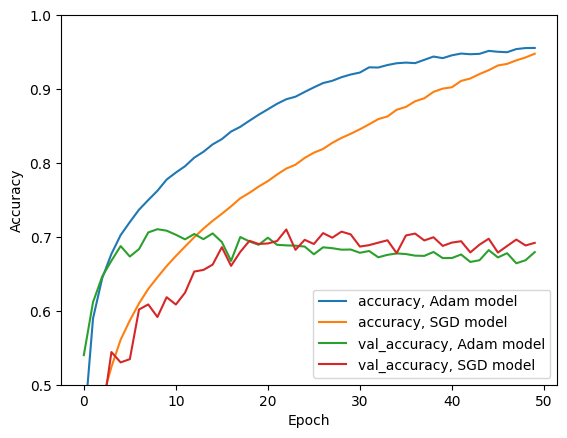

In [14]:
with open('history_relu_sgd.pkl', 'rb') as file:
    history_relu_sgd = pickle.load(file)
    
model_relu_sgd.load_weights('model_relu_sgd.weights.h5')
compare_stats(history_relu, history_relu_sgd, model_relu, model_relu_sgd, 'Adam model', 'SGD model')

# Assignment 4. Running the model as an MLP with the same parameters as the CNN model

In [13]:
# num params in our cnn model: 122_570

model_match = models.Sequential([
  layers.Flatten(),
  layers.Dense(40, activation = "relu"),
  layers.Dense(10, activation = "softmax")
])

model_match.compile(optimizer = optimizers.Adam(learning_rate=1e-3, decay=2), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model_match.build(train_images.shape)
model_match.summary()

history = model_match.fit(train_images, train_labels, epochs=1000,
                        validation_data = (test_images, test_labels))



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (50000, 3072)             0         
_________________________________________________________________
dense_14 (Dense)             (50000, 40)               122920    
_________________________________________________________________
dense_15 (Dense)             (50000, 10)               410       
Total params: 123,330
Trainable params: 123,330
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1563/1563 [==============================] - 2s 1ms/step - loss: 2.2967 - accuracy: 0.1219 - val_loss: 2.2839 - val_accuracy: 0.1306
Epoch 2/1000
1563/1563 [==============================] - 1s 820us/step - loss: 2.2807 - accuracy: 0.1342 - val_loss: 2.2785 - val_accuracy: 0.1386
Epoch 3/1000
1563/1563 [==============================] - 1s 795us/step - loss: 2.27

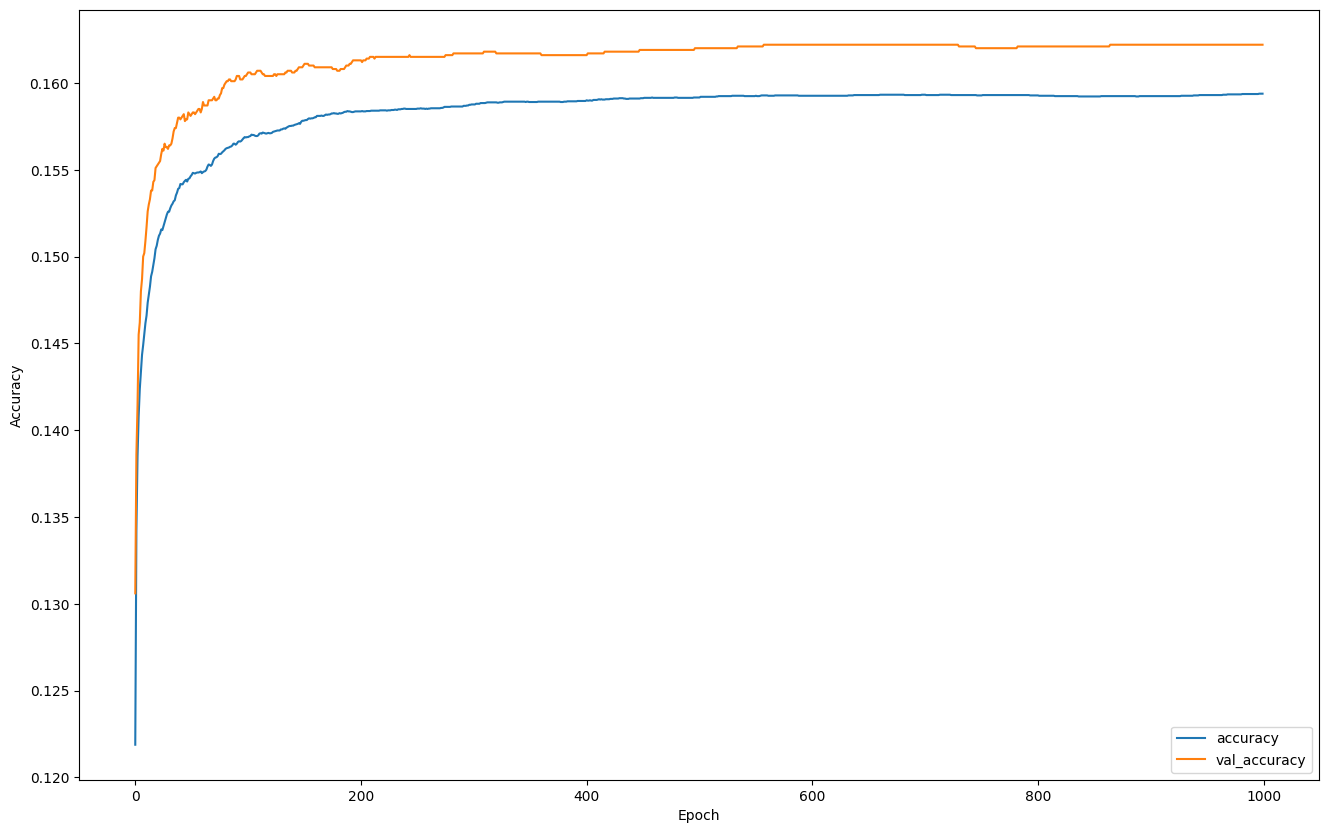

In [14]:
plt.figure(figsize=(16,10))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()